# Примитивы фреймворка Pytorch. 

# Первая и основная составляющая типичного современного фреймворка для машинного обучения - Tensor

В интерфейсе базовых операций тензор ничем не отличается от np.array, но при этом тензоры можно эффективно использовать при обучении на gpu. 

In [1]:
import torch

In [3]:
# Создаем неинициализированный тензор
x = torch.Tensor(5, 3)

In [4]:
x


 0.0000e+00  0.0000e+00  1.7423e+21
 4.6577e-10  7.0065e-45  0.0000e+00
 0.0000e+00  0.0000e+00  0.0000e+00
 0.0000e+00  0.0000e+00  0.0000e+00
 0.0000e+00  0.0000e+00  0.0000e+00
[torch.FloatTensor of size 5x3]

In [5]:
# инициализируем тензор нормальным распределением
x = torch.rand(5, 3)

In [6]:
x


 0.4182  0.7082  0.2494
 0.7768  0.2455  0.5667
 0.9181  0.8303  0.0754
 0.2917  0.0540  0.5722
 0.8588  0.4882  0.1710
[torch.FloatTensor of size 5x3]

In [7]:
x.size()

torch.Size([5, 3])

In [8]:
y = torch.rand(5, 3)

In [9]:
y


 0.7304  0.9615  0.2586
 0.3227  0.7867  0.0043
 0.8287  0.2735  0.0115
 0.2667  0.1086  0.5766
 0.4664  0.3912  0.6080
[torch.FloatTensor of size 5x3]

In [10]:
# Первый способ сложить 2 тензора
x + y


 1.1486  1.6697  0.5079
 1.0996  1.0322  0.5710
 1.7468  1.1038  0.0869
 0.5584  0.1626  1.1488
 1.3252  0.8794  0.7790
[torch.FloatTensor of size 5x3]

In [11]:
# Второй способ сложить 2 тензора
x.add(y)


 1.1486  1.6697  0.5079
 1.0996  1.0322  0.5710
 1.7468  1.1038  0.0869
 0.5584  0.1626  1.1488
 1.3252  0.8794  0.7790
[torch.FloatTensor of size 5x3]

In [12]:
# А еще можно так:
torch.add(x, y)


 1.1486  1.6697  0.5079
 1.0996  1.0322  0.5710
 1.7468  1.1038  0.0869
 0.5584  0.1626  1.1488
 1.3252  0.8794  0.7790
[torch.FloatTensor of size 5x3]

In [13]:
# Сохраняем выход в тензор result
result = torch.Tensor(5, 3)
torch.add(x, y, out=result)


 1.1486  1.6697  0.5079
 1.0996  1.0322  0.5710
 1.7468  1.1038  0.0869
 0.5584  0.1626  1.1488
 1.3252  0.8794  0.7790
[torch.FloatTensor of size 5x3]

In [14]:
# Перевод из numpy в torch
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b) 

[ 2.  2.  2.  2.  2.]

 2
 2
 2
 2
 2
[torch.DoubleTensor of size 5]



In [15]:
a = torch.randn(5, 3) 
b = torch.randn(3, 4)

In [16]:
# Матричное умножение

torch.mm(a,b)
a.mm(b)


 6.4576  2.0158 -0.4964  5.6783
 2.9732  0.9977 -0.2714  2.6477
 1.7898  1.6968  1.3408  0.8617
 0.0795  1.6087  2.7669 -1.3341
-1.3793 -0.9641 -1.4624 -0.3738
[torch.FloatTensor of size 5x4]

In [17]:
# для python 3

a @ b


 6.4576  2.0158 -0.4964  5.6783
 2.9732  0.9977 -0.2714  2.6477
 1.7898  1.6968  1.3408  0.8617
 0.0795  1.6087  2.7669 -1.3341
-1.3793 -0.9641 -1.4624 -0.3738
[torch.FloatTensor of size 5x4]

# Но самое важное в фреймворках - графы вычисления и автоматическое дифференцирование 

In [77]:
# Variable - обертка над тензором, содержащая значения градиента и еще немного полезной информации
import torch
from torch.autograd import Variable
x = Variable(torch.ones(2, 2), requires_grad = True)
x  

Variable containing:
 1  1
 1  1
[torch.FloatTensor of size 2x2]

In [78]:
x.data


 1  1
 1  1
[torch.FloatTensor of size 2x2]

In [79]:
x.grad

In [80]:
# производная операции, которая породила переменную.
x.grad_fn

In [81]:
y = x + 2
y

Variable containing:
 3  3
 3  3
[torch.FloatTensor of size 2x2]

В новой версии pytorch промежуточные градиенты не сохраняются.
Но если мы хотим все-таки увидеть их значения нужно использовать
функцию variable.register_hook(print)

In [82]:
from __future__ import print_function
print (y.grad is None)
y.register_hook(print)

True


In [83]:
z = y * y * 2
z
print (z.grad is None)
z.register_hook(print)

True


In [84]:
out = z.mean()
out

Variable containing:
 18
[torch.FloatTensor of size 1]

In [85]:
# Запускаем бэкпроп
# На выходе получаем градиенты из хуков
out.backward()

Variable containing:
 0.2500  0.2500
 0.2500  0.2500
[torch.FloatTensor of size 2x2]

Variable containing:
 3  3
 3  3
[torch.FloatTensor of size 2x2]



In [86]:

x.grad

Variable containing:
 3  3
 3  3
[torch.FloatTensor of size 2x2]

# Что произошло?

autograd строит ациклический граф вычисления из переменных и операций(функций)
out.backward проходит по всему графу начиная от вершины out и считает градиенты вершин

In [66]:
class MyReLU(torch.autograd.Function):

    def forward(self, input):
        # forward pass
        self.save_for_backward(input)
        return input.clamp(min=0)

    def backward(self, grad_output):
        # backward pass
        input, = self.saved_tensors
        grad_input = grad_output.clone()
        grad_input[input < 0] = 0
        return grad_input


Если мы хотим сохранить значения переменных в графе, то используем retain_graph = True. 
Это может быть нужно, если мы хотим несколько раз подряд сделать backprop

In [51]:
x = Variable(torch.ones(2, 2), requires_grad = True)
y = x + 2
y.backward(torch.ones(2, 2))
x.grad


Variable containing:
 1  1
 1  1
[torch.FloatTensor of size 2x2]

In [52]:
gradient = torch.randn(2, 2)

y.backward(gradient)

x.grad

Variable containing:
 2.4770 -0.4606
 0.1382  0.7909
[torch.FloatTensor of size 2x2]

In [87]:
x = Variable(torch.ones(2, 2), requires_grad = True)
y = x + 2
y.backward(torch.ones(2, 2), retain_graph=True)
x.grad


Variable containing:
 1  1
 1  1
[torch.FloatTensor of size 2x2]

In [88]:
gradient = torch.randn(2, 2)

y.backward(gradient)

x.grad

Variable containing:
 1.3943  0.3964
 2.0271  0.1825
[torch.FloatTensor of size 2x2]

# Базовые слои и обучение

In [82]:
from torch.autograd import Variable

N, D_in, D_out = 64, 1000, 10

x = Variable(torch.randn(N, D_in))
y = Variable(torch.randn(N, D_out), requires_grad=False)

model = torch.nn.Sequential(
          torch.nn.Linear(D_in, D_out)
        )

loss_fn = torch.nn.MSELoss(size_average=False)

learning_rate = 1e-4
for t in range(500):
    y_pred = model(x)

    loss = loss_fn(y_pred, y)
    print(t, loss.data[0])

    model.zero_grad()

    loss.backward()

    for param in model.parameters():
        param.data -= learning_rate * param.grad.data

0 815.6329956054688
1 520.9810791015625
2 338.09722900390625
3 222.72401428222656
4 148.78024291992188
5 100.6663589477539
6 68.90978240966797
7 47.669254302978516
8 33.28770065307617
9 23.441226959228516
10 16.631391525268555
11 11.878806114196777
12 8.534859657287598
13 6.1648430824279785
14 4.474132061004639
15 3.260962963104248
16 2.3858916759490967
17 1.7517246007919312
18 1.2901874780654907
19 0.9529986381530762
20 0.705798327922821
21 0.5239947438240051
22 0.3898971676826477
23 0.2907238006591797
24 0.2171982377767563
25 0.16256260871887207
26 0.12187784910202026
27 0.09152210503816605
28 0.06883050501346588
29 0.051839083433151245
30 0.039094869047403336
31 0.029521621763706207
32 0.02231975458562374
33 0.016894396394491196
34 0.01280200481414795
35 0.009711208753287792
36 0.007374109234660864
37 0.005604883655905724
38 0.004264099057763815
39 0.0032469243742525578
40 0.0024745578411966562
41 0.0018874561646953225
42 0.0014407738344743848
43 0.0011006641434505582
44 0.000841473

In [87]:
loss_fn(model(x), y)

Variable containing:
1.00000e-12 *
  1.6793
[torch.FloatTensor of size 1]

# Оптимизаторы

In [29]:
N, D_in, D_out = 64, 1000, 10

x = Variable(torch.randn(N, D_in))
y = Variable(torch.randn(N, D_out), requires_grad=False)

model = torch.nn.Sequential(
          torch.nn.Linear(D_in, D_out),

        )
loss_fn = torch.nn.MSELoss(size_average=False)

learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for t in range(500):
    y_pred = model(x)

    loss = loss_fn(y_pred, y)
    print(t, loss.data[0])

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

(0, 817.465576171875)
(1, 803.2166748046875)
(2, 789.1116943359375)
(3, 775.153564453125)
(4, 761.343994140625)
(5, 747.6851196289062)
(6, 734.1785888671875)
(7, 720.8258666992188)
(8, 707.628173828125)
(9, 694.5877685546875)
(10, 681.7051391601562)
(11, 668.9824829101562)
(12, 656.420166015625)
(13, 644.0187377929688)
(14, 631.779296875)
(15, 619.7022705078125)
(16, 607.78857421875)
(17, 596.0384521484375)
(18, 584.4517211914062)
(19, 573.0286865234375)
(20, 561.7686767578125)
(21, 550.6722412109375)
(22, 539.7394409179688)
(23, 528.9688110351562)
(24, 518.3605346679688)
(25, 507.914306640625)
(26, 497.62884521484375)
(27, 487.50335693359375)
(28, 477.5374450683594)
(29, 467.72967529296875)
(30, 458.0795593261719)
(31, 448.58544921875)
(32, 439.2461853027344)
(33, 430.0614013671875)
(34, 421.0287170410156)
(35, 412.1478271484375)
(36, 403.4163513183594)
(37, 394.8335266113281)
(38, 386.39788818359375)
(39, 378.1077575683594)
(40, 369.9617004394531)
(41, 361.95806884765625)
(42, 354.09

In [6]:
sgd = torch.optim.SGD
adadelta = torch.optim.Adadelta
adagrad = torch.optim.Adagrad
rmsprop = torch.optim.RMSprop

# Сохранение и загрузка модели

In [30]:
# Сохранение

def save_checkpoint(state, filename='checkpoint.pth.tar'):
    torch.save(state, filename)
epoch =1    
save_checkpoint({
            'epoch': epoch,
            'state_dict': model.state_dict(),
            'optimizer' : optimizer.state_dict(),
        })

In [35]:
# Пример загрузки

checkpoint = torch.load('checkpoint.pth.tar')
start_epoch = checkpoint['epoch']
model.load_state_dict(checkpoint['state_dict'])
optimizer.load_state_dict(checkpoint['optimizer'])

# Модели с произвольно сложной архитектурой

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.layer1 = 
        self.layer2 = 

    def forward(self, x):
        pass

# Dataloader - класс для работы с датасетами

In [2]:
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision import transforms

to_numpy = lambda x: x.numpy()
transform = transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                    ])
train_dataset = MNIST('.', train=True, download=True, transform=transform)
test_dataset = MNIST('.', train=False, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

Processing...
Done!


# Пример сверточной сети

In [6]:
import torch.nn as nn
from torch.autograd import Variable
images_train = torch.randn(16, 3, 100, 100)


image_size = images_train.size(2)
channels = images_train.size(1)
class myConvNet(nn.Module):
    def __init__(self):
        super(myConvNet, self).__init__()
        self.conv_layers = nn.Sequential(nn.Conv2d(channels, 3, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2))
        self.linear_layers = nn.Sequential(nn.Linear(image_size/2*image_size/2*3, 10), nn.LogSoftmax())
    
    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(x.size(0), -1)
        x = self.linear_layers(x)
        return x

In [7]:
# пример forward pass
network = myConvNet()
X = Variable(images_train)
output = network.forward(X)

/home/poisk/mlearning/anaconda2/lib/python2.7/site-packages/torch/nn/modules/container.py:67: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


## Datasets and Dataloaders

Важная составляющая машинного обучения - работа с данными (загрузка, предобработка, аугментация). PyTorch имеет встроенные средства для этих операций.


Разберем эти операции на примере датасета особых точек лица, находить которые мы будем учиться на семинаре.



Примеры особых точек


left_eye_center, right_eye_center, left_eye_inner_corner, left_eye_outer_corner, right_eye_inner_corner, right_eye_outer_corner, left_eyebrow_inner_end, left_eyebrow_outer_end, right_eyebrow_inner_end, right_eyebrow_outer_end, nose_tip, mouth_left_corner, mouth_right_corner, mouth_center_top_lip, mouth_center_bottom_lip

Image name: 1466.jpeg
Landmarks shape: (68, 2)
First 4 Landmarks: [[ 1. 34.]
 [-1. 45.]
 [ 0. 56.]
 [ 1. 66.]]


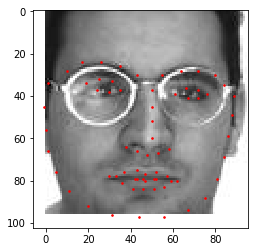

In [18]:
%matplotlib inline
from __future__ import print_function, division
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

landmarks_frame = pd.read_csv('dataset/train/face_landmarks.csv')

n = 500
img_name = landmarks_frame.ix[n, 0]
landmarks = landmarks_frame.ix[n, 1:].as_matrix().astype('float')
landmarks = landmarks.reshape(-1, 2)

print('Image name: {}'.format(img_name))
print('Landmarks shape: {}'.format(landmarks.shape))
print('First 4 Landmarks: {}'.format(landmarks[:4]))

def show_landmarks(image, landmarks):
    """Show image with landmarks"""
    plt.imshow(image, cmap='gray')
    plt.scatter(landmarks[:, 0], landmarks[:, 1], s=10, marker='.', c='r')
    plt.pause(0.001)  

plt.figure()
show_landmarks(io.imread(os.path.join('dataset/train/', img_name)),
               landmarks)
plt.show()

Dataset class
-------------

``torch.utils.data.Dataset`` -- абстрактный класс представляющий датасет. 


Для нового класса датасета нужно отнаследоваться от класса Dataset и реализовать следующие функции:


- ``__len__``  так что len(dataset) возвратит длину датасета.


- ``__getitem__``  - индексация, такая что dataset[i] возвратит i-й элемент





In [19]:
class FaceLandmarksDataset(Dataset):
    """Face Landmarks dataset."""

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.landmarks_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.landmarks_frame)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.landmarks_frame.ix[idx, 0])
        image = io.imread(img_name)
        landmarks = self.landmarks_frame.ix[idx, 1:].as_matrix().astype('float')
        landmarks = landmarks.reshape(-1, 2)
        sample = {'image': image, 'landmarks': landmarks}

        if self.transform:
            sample = self.transform(sample)

        return sample

0 (96, 96) (68, 2)


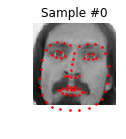

1 (96, 96) (68, 2)


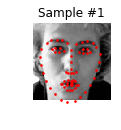

2 (96, 96) (68, 2)


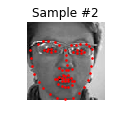

3 (96, 96) (68, 2)


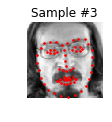

In [20]:
face_dataset = FaceLandmarksDataset(csv_file='dataset/train/face_landmarks.csv',
                                    root_dir='dataset/train')

fig = plt.figure()

for i in range(len(face_dataset)):
    sample = face_dataset[i]

    print(i, sample['image'].shape, sample['landmarks'].shape)

    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    show_landmarks(**sample)

    if i == 3:
        plt.show()
        break

Преобразования (transformations)
----------

Так как часто не все изображения одинакового размера, нужно уметь автоматически приводить их к таковому. Также полезно уметь увеличивать размер датасета (аугментация).

-  ``Rescale``: приведение к определенному размеру
-  ``RandomCrop``: случайный кроп изображения. (вариант аугментации)
-  ``ToTensor``: приведение к тензору




In [21]:
class Rescale(object):
    """Rescale the image in a sample to a given size.

    Args:
        output_size (tuple or tuple): Desired output size. If tuple, output is
            matched to output_size. If int, smaller of image edges is matched
            to output_size keeping aspect ratio the same.
    """

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        self.output_size = output_size

    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']

        h, w = image.shape[:2]
        if isinstance(self.output_size, int):
            if h > w:
                new_h, new_w = self.output_size * h / w, self.output_size
            else:
                new_h, new_w = self.output_size, self.output_size * w / h
        else:
            new_h, new_w = self.output_size

        new_h, new_w = int(new_h), int(new_w)

        img = transform.resize(image, (new_h, new_w))

        # h and w are swapped for landmarks because for images,
        # x and y axes are axis 1 and 0 respectively
        landmarks = landmarks * [new_w / w, new_h / h]

        return {'image': img, 'landmarks': landmarks}


class RandomCrop(object):
    """Crop randomly the image in a sample.

    Args:
        output_size (tuple or int): Desired output size. If int, square crop
            is made.
    """

    def __init__(self, output_size):
        assert isinstance(output_size, (int, tuple))
        if isinstance(output_size, int):
            self.output_size = (output_size, output_size)
        else:
            assert len(output_size) == 2
            self.output_size = output_size

    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']

        h, w = image.shape[:2]
        new_h, new_w = self.output_size

        top = np.random.randint(0, h - new_h)
        left = np.random.randint(0, w - new_w)

        image = image[top: top + new_h,
                      left: left + new_w]

        landmarks = landmarks - [left, top]

        return {'image': image, 'landmarks': landmarks}


class ToTensor(object):
    """Convert ndarrays in sample to Tensors."""

    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']
 
        return {'image': torch.from_numpy(image),
                'landmarks': torch.from_numpy(landmarks)}

## Итерирование по датасету

In [22]:
transformed_dataset = FaceLandmarksDataset(csv_file='dataset/train/face_landmarks.csv',
                                           root_dir='dataset/train/',
                                           transform=transforms.Compose([
                                               Rescale(68),
                                               RandomCrop(60),
                                               ToTensor()
                                           ]))

for i in range(len(transformed_dataset)):
    sample = transformed_dataset[i]

    print(i, sample['image'].size(), sample['landmarks'].size())

    if i == 3:
        break

0 torch.Size([60, 60]) torch.Size([68, 2])
1 torch.Size([60, 60]) torch.Size([68, 2])
2 torch.Size([60, 60]) torch.Size([68, 2])
3 torch.Size([60, 60]) torch.Size([68, 2])


Для эффективного обучения хотим иметь еще следующие возможности:

-  Батчи
-  Шаффлы
-  Параллельная загрузка

``torch.utils.data.DataLoader`` итератор, который делает все что нам нужно. 

0
1
2
3


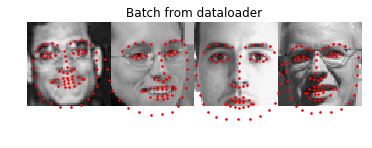

In [23]:
dataloader = DataLoader(transformed_dataset, batch_size=4,
                        shuffle=True, num_workers=4)


# Helper function to show a batch
def show_landmarks_batch(sample_batched):
    """Show image with landmarks for a batch of samples."""
    images_batch, landmarks_batch = \
            sample_batched['image'], sample_batched['landmarks']
    batch_size = len(images_batch)
    im_size = images_batch.size(2)

    grid = utils.make_grid(images_batch)
    plt.imshow(grid.numpy().transpose(1,0,2).reshape(im_size, -1), cmap="gray")

    for i in range(batch_size):
        plt.scatter(landmarks_batch[i, :, 0].numpy() + i * im_size,
                    landmarks_batch[i, :, 1].numpy(),
                    s=10, marker='.', c='r')

        plt.title('Batch from dataloader')

for i_batch, sample_batched in enumerate(dataloader):
    print(i_batch)

    # observe 4th batch and stop.
    if i_batch == 3:
        plt.figure()
        show_landmarks_batch(sample_batched)
        plt.axis('off')
        plt.ioff()
        plt.show()
        break

На самом деле простые аугментации и трансформации уже реализованы в библиотеке

``torchvision.transforms``:
``torchvision.transforms.CenterCrop(size)``
``torchvision.transforms.ColorJitter(brightness=0, contrast=0, saturation=0, hue=0)``
``torchvision.transforms.RandomAffine(degrees, translate=None, scale=None, shear=None, resample=False, fillcolor=0)``

И т.д.

### Пример обучения сети

Image name: 109.jpeg
Landmarks shape: (68, 2)
First 4 Landmarks: [[ 7. 41.]
 [ 8. 51.]
 [10. 60.]
 [13. 70.]]


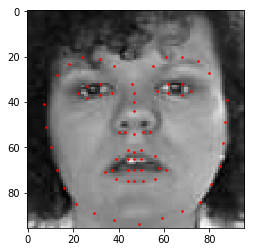

In [24]:
%matplotlib inline
from __future__ import print_function, division
import os
import torch
import sys
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from torch.nn import MSELoss, Sequential, Linear, Sigmoid, Tanh
from torch.autograd import Variable
from torch import nn
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

landmarks_frame = pd.read_csv('dataset/train/face_landmarks.csv')

n = 100
img_name = landmarks_frame.ix[n, 0]
landmarks = landmarks_frame.ix[n, 1:].as_matrix().astype('float')
landmarks = landmarks.reshape(-1, 2)

print('Image name: {}'.format(img_name))
print('Landmarks shape: {}'.format(landmarks.shape))
print('First 4 Landmarks: {}'.format(landmarks[:4]))

def show_landmarks(image, landmarks):
    """Show image with landmarks"""
    plt.imshow(image, cmap='gray')
    plt.scatter(landmarks[:, 0], landmarks[:, 1], s=10, marker='.', c='red', cmap='rgb')
    plt.pause(0.001)  

plt.figure()
show_landmarks(io.imread(os.path.join('dataset/train/', img_name)),
               landmarks)
plt.show()

In [26]:
class FaceLandmarksDataset():
    """Face Landmarks dataset."""

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.landmarks_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.landmarks_frame)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.landmarks_frame.iloc[idx, 0])
        image = io.imread(img_name)
        landmarks = self.landmarks_frame.iloc[idx, 1:].as_matrix().astype('float')
        landmarks = landmarks.reshape(-1, 2)
        sample = {'image': image, 'landmarks': landmarks}

        if self.transform:
            sample = self.transform(sample)

        return sample

In [27]:
class ToTensor(object):
    """Convert ndarrays in sample to Tensors."""

    def __call__(self, sample):
        image, landmarks = sample['image'], sample['landmarks']
        return {'image': torch.from_numpy(image),
                'landmarks': torch.from_numpy(landmarks)}

In [29]:
train_dataset = FaceLandmarksDataset(csv_file='dataset/train/face_landmarks.csv',
                                     root_dir='dataset/train',
                                     transform=ToTensor()
                                     )

test_dataset = FaceLandmarksDataset(csv_file='dataset/test/face_landmarks.csv',
                                     root_dir='dataset/test',
                                     transform=ToTensor()
                                     )
train_dataloader = DataLoader(train_dataset, batch_size=64,
                        shuffle=True, num_workers=4)

test_dataloader = DataLoader(test_dataset, batch_size=64,
                        shuffle=True, num_workers=4)

In [32]:
dtype=torch.FloatTensor
use_cuda = False

def train(network, epochs, learning_rate, loss=MSELoss(), optim=torch.optim.Adam):
    train_loss_epochs = []
    test_loss_epochs = []
    optimizer = optim(network.parameters(), lr=learning_rate)
    try:
        for epoch in range(epochs):
            losses = []
            accuracies = []
            for sample in train_dataloader:
                
                X = sample['image']
                X = Variable(X).type(dtype)[:,None]
                y = sample['landmarks']
                y = Variable(y.view(y.shape[0], -1)).type(dtype)
                
                
                if use_cuda:
                    X, y = X.cuda(), y.cuda()
                
                prediction = network(X)
                loss_batch = loss(prediction, y)
                losses.append(loss_batch.data[0])
                optimizer.zero_grad()
                loss_batch.backward()
                optimizer.step()
  
            train_loss_epochs.append(np.mean(losses))
            losses = []    
            for sample in test_dataloader:
                X = sample['image'].cuda()
                X = Variable(X).type(dtype)[:,None]
                y = sample['landmarks'].cuda()
                y = Variable(y.view(y.shape[0], -1)).type(dtype)
                if use_cuda:
                    X, y = X.cuda(), y.cuda()
                
                prediction = network(X)
                loss_batch = loss(prediction, y)
                losses.append(loss_batch.data[0])
                
            test_loss_epochs.append(np.mean(losses))
            sys.stdout.write('\rEpoch {0}... (Train/Test) MSE: {1:.3f}/{2:.3f}'.format(
                        epoch, train_loss_epochs[-1], test_loss_epochs[-1]))
        

    except KeyboardInterrupt:
        pass
    
    best_test = min(test_loss_epochs[1:])
    best_train = min(train_loss_epochs[1:])
    
    sys.stdout.write('\n\t\t\t\t\t\t\tMinimal MSE (Train/Test): {1:.3f}/{2:.3f}'.format( 
                    0, best_train, best_test ))
    
    
    
    plt.figure(figsize=(12, 5))
    plt.plot(train_loss_epochs[1:], label='Train')
    plt.plot(test_loss_epochs[1:], label='Test')
    plt.xlabel('Epochs', fontsize=16)
    plt.ylabel('Loss', fontsize=16)
    plt.legend(loc=0, fontsize=16)
    plt.grid('on')
    plt.show()

In [44]:
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.conv_1 =  nn.Sequential(
                                            nn.BatchNorm2d(1),
                                            nn.Conv2d(1, 32, 3, padding=1), 
                                            nn.ReLU(),
                                            nn.MaxPool2d(2),
                                            )
        
        self.conv_2 = nn.Sequential(        nn.BatchNorm2d(32),                   
                                            nn.Conv2d(32, 64, 3, padding=1),
                                            nn.ReLU(),
                                            nn.MaxPool2d(2)
                                            )
                                                 
        
        self.linear_1 = nn.Sequential(
                                            nn.Dropout(p=0.),
                                            nn.BatchNorm1d(36864),
                                            nn.Linear(36864, 500), 
                                            nn.ReLU(),
                                            )
                                    
        self.linear_2 = nn.Sequential(      
                                            nn.BatchNorm1d(500),
                                            nn.Linear(500,68*2),
                                            )
                
    def forward(self, x):
        
        x = self.conv_1(x)
        x = self.conv_2(x)
        x = x.view(x.size(0), -1)
        x = self.linear_1(x)
        x = self.linear_2(x)
        return x

In [47]:
net = NN()

In [ ]:
train(net, 30, 0.1)